EE18BTECH11030

M.Varun Sankar

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import math

In [107]:
n = 100
e = []
for i in range(1,n+1):
  e.append(5 * (np.sin(i/(n * 3 * np.pi))) + np.sin(i/(n * 10 * np.pi)))
#print(e)
d = 1
d1 = 0.08
d2 = 0.025
d3 = 0.005

h = cp.Variable(n)
cost = 0.0
for i in range(n):
  cost += 2 * ((cp.pos(h[i]-e[i])**2)) + 30 * (cp.pos(h[i]-e[i])) + 12 * ((cp.pos(e[i] - h[i])**2)) + cp.pos(e[i]- h[i])
objective = cp.Minimize(cost)
constraint = []
for i in range(n):
  if i < n-1:
    constraint += [(h[i+1] - h[i]) <= d1 * d]
for i in range(1, n):
  if i < n-1:
    constraint += [(h[i+1] - 2*h[i] + h[i-1]) <= d2 * (d**2)]
for i in range(2, n):
  if i < n-1:
    constraint += [(h[i+1] - 3*h[i] + 3*h[i-1] - h[i-2]) <= d3 * (d**3)]
prob = cp.Problem(objective, constraint)
prob.solve()
print("Optimal cost:",objective.value)

Optimal cost: 0.0010256514148092766


h values
 [0.00562342 0.01124725 0.01687006 0.02249446 0.02811675 0.03374126
 0.03936388 0.04498669 0.05061078 0.05623189 0.06185907 0.06747814
 0.07310495 0.07872457 0.08434811 0.08997283 0.09559255 0.10121803
 0.10683823 0.11246083 0.11808479 0.12370494 0.12932816 0.13494992
 0.14057057 0.1461932  0.15181397 0.15743493 0.16305669 0.16867699
 0.17429771 0.17991862 0.18553856 0.19115871 0.19677884 0.20239832
 0.2080178  0.21363719 0.21925613 0.22487489 0.23049353 0.23611181
 0.24172982 0.24734765 0.25296519 0.25858242 0.26419941 0.26981613
 0.27543253 0.28104864 0.28666448 0.29227999 0.29789517 0.30351008
 0.30912465 0.31473882 0.32035274 0.32596635 0.33157945 0.33719229
 0.34280495 0.34841692 0.35402858 0.35964031 0.36525104 0.37086143
 0.37647229 0.38208156 0.38769066 0.39330073 0.39890805 0.40451624
 0.41012538 0.4157304  0.42133921 0.4269458  0.43254905 0.43815872
 0.44375965 0.44936437 0.45497205 0.46057044 0.46617917 0.4717775
 0.47737898 0.48298491 0.48858142 0.4941862  0.499783

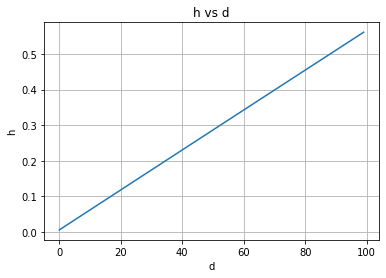

In [108]:
print("h values\n", h.value)
plt.figure()
plt.grid()
plt.title("h vs d")
plt.xlabel("d")
plt.ylabel("h")
plt.plot(h.value)
plt.show()

e values
 [0.005623473655120707, 0.011246941305485186, 0.01687039694634393, 0.022493834572960895, 0.028117248180620218, 0.03374063176463293, 0.03936397932034372, 0.044987284843137625, 0.05061054232844676, 0.05623374577175706, 0.06185688916861505, 0.06747996651463445, 0.07310297180550303, 0.07872589903698926, 0.08434874220494906, 0.08997149530533254, 0.09559415233419065, 0.10121670728768208, 0.10683915416207977, 0.11246148695377782, 0.11808369965929806, 0.12370578627529691, 0.12932774079857204, 0.13494955722606902, 0.14057122955488827, 0.1461927517822915, 0.1518141179057087, 0.15743532192274465, 0.16305635783118577, 0.16867721962900684, 0.17429790131437764, 0.17991839688566974, 0.18553870034146322, 0.19115880568055338, 0.19677870690195753, 0.20239839800492154, 0.20801787298892674, 0.2136371258536966, 0.21925615059920334, 0.2248749412256748, 0.23049349173360115, 0.23611179612374136, 0.24172984839713044, 0.24734764255508557, 0.2529651725992132, 0.2585824325314156, 0.26419941635389776, 0.2

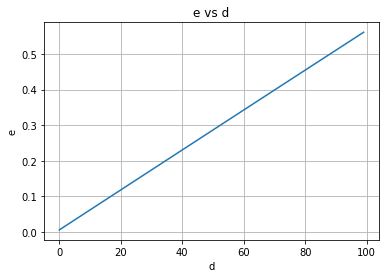

In [109]:
print("e values\n", e)
plt.figure()
plt.grid()
plt.title("e vs d")
plt.xlabel("d")
plt.ylabel("e")
plt.plot(e)
plt.show()

h - e values
 [-4.97165758e-08  3.04646010e-07 -3.38085231e-07  6.23098751e-07
 -5.01755260e-07  6.31344879e-07 -1.02092289e-07 -5.98397161e-07
  2.42101620e-07 -1.85653923e-06  2.18161403e-06 -1.82854935e-06
  1.97816301e-06 -1.32408430e-06 -6.33953437e-07  1.33391533e-06
 -1.60145257e-06  1.32067613e-06 -9.26888859e-07 -6.56832567e-07
  1.09531392e-06 -8.44246879e-07  4.21043611e-07  3.64711365e-07
 -6.61523577e-07  4.49615620e-07 -1.44626044e-07 -3.90125142e-07
  3.36578348e-07 -2.26560747e-07 -1.87672293e-07  2.26071438e-07
 -1.44325489e-07 -9.92512572e-08  1.30585789e-07 -7.79803774e-08
 -7.61795222e-08  6.89700962e-08 -1.87552865e-08 -5.05918573e-08
  3.46684406e-08  1.39017973e-08 -2.43404560e-08  1.17195086e-08
  1.65775596e-08 -1.22318484e-08 -1.58188501e-09  1.28843298e-08
 -3.39618211e-09 -6.33568414e-09  1.26073718e-08  2.76433737e-09
 -1.57273449e-08  1.38389138e-08  1.94622455e-08 -3.52075047e-08
 -6.89103574e-09  5.07849182e-08 -5.65735416e-08 -6.51017596e-08
  1.1126907

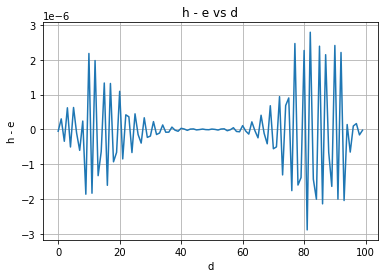

In [110]:
print("h - e values\n", h.value - e)
plt.figure()
plt.grid()
plt.title("h - e vs d")
plt.xlabel("d")
plt.ylabel("h - e")
plt.plot(h.value - e)
plt.show()

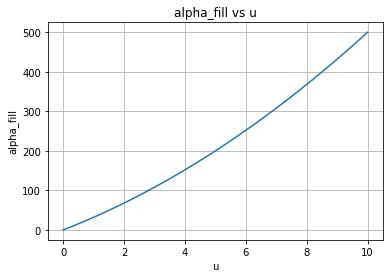

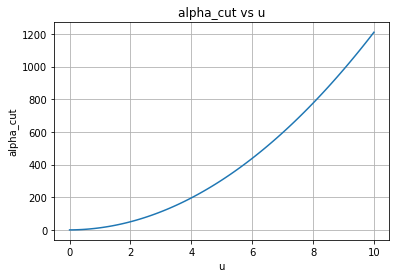

These plots shows both fill and cut are convex


In [111]:
# Verfying the convexity of cut and fill functions
u = np.linspace(0,10,101)
alpha_fill = 2 * (u ** 2) + 30 * u
plt.figure()
plt.grid()
plt.title("alpha_fill vs u")
plt.xlabel("u")
plt.ylabel("alpha_fill")
plt.plot(u,alpha_fill)
plt.show()

alpha_cut = 12 * (u ** 2) + u
plt.figure()
plt.grid()
plt.title("alpha_cut vs u")
plt.xlabel("u")
plt.ylabel("alpha_cut")
plt.plot(u,alpha_cut)
plt.show()

print("These plots shows both fill and cut are convex")